#### Imports

In [ ]:
#We are obtaining the bayesian networks from https://www.bnlearn.com/bnrepository

from pgmpy.readwrite import BIFReader
from pgmpy.inference import VariableElimination
import random
from asvFormula.bayesianNetworks.bayesianNetwork import *
from asvFormula.bayesianNetworks import networkSamplesPath
from asvFormula.datasetManipulation import *

### Create the network and the dataset

In [ ]:
random.seed(10)

cancerNetworkPath = networkSamplesPath + "/cancer.bif"
#cancerNetworkPath = networkSamplesPath + "/cancer_tree.bif"

BNmodel = BIFReader(cancerNetworkPath).get_model()
BNInference = VariableElimination(BNmodel)

In [ ]:
variableToPredict = "Pollution"

# Create a BNDatabaseGenerator object from the model
dataFromBN = datasetFromBayesianNetwork(BNmodel, 2000)
valuesPerFeature, encodedDataset = encodeCategoricalColumns(dataFromBN)
dtTreeClassifier = decisionTreeFromDataset(encodedDataset, variableToPredict , 2)


  0%|          | 0/5 [00:00<?, ?it/s]

The model accuracy is : 0.8975


In [ ]:
BNInference.query(variables=['Cancer']).values
query = BNInference.query(evidence={'Pollution':'high', 'Smoker':'True', 'Cancer' : 'True', 'Dyspnoea' : 'True'}, joint=True, variables = ['Xray'] )
feature = 'Xray'
query.get_value(**{feature :'negative'})

### Student network example

In [2]:
random.seed(10)

cancerNetworkPath = networkSamplesPath + "/student.bif"

BNmodel = BIFReader(cancerNetworkPath).get_model()
BNInference = VariableElimination(BNmodel)

In [ ]:
variableToPredict = "Acceptance"

# Create a BNDatabaseGenerator object from the model
dataFromBN = datasetFromBayesianNetwork(BNmodel, 2000)
valuesPerFeature, encodedDataset = encodeCategoricalColumns(dataFromBN)
dtTreeClassifier = decisionTreeFromDataset(encodedDataset, variableToPredict , 2)

dtAsNetwork = obtainDecisionTreeDigraph(dtTreeClassifier, encodedDataset.columns)

  0%|          | 0/6 [00:00<?, ?it/s]

The model accuracy is : 0.825


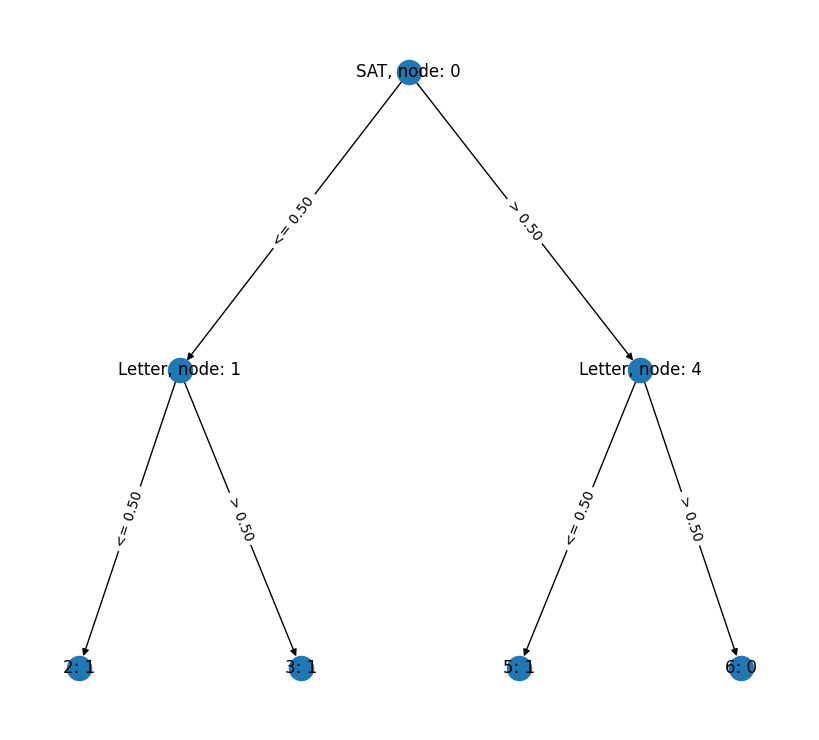

[0.71946836 0.28053164]


0.7194683636363637

In [ ]:
#drawDecisionTree(dtAsNetwork)
#print(valuesPerFeature)
#print(encodedDataset['Acceptance'].value_counts())
#print(dataFromBN['Acceptance'].value_counts())
#drawDecisionTree(dtAsNetwork)
print(meanPredictionForDTinBNWithEvidenceExact(dtAsNetwork, BNInference, valuesPerFeature, {"SAT" : 1}))
query = BNInference.query(evidence={'SAT':'s1'}, joint=True, variables = ['Letter'] )
query.get_value(**{'Letter' : 'l1'})